In [46]:
import sys
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
data_A = pd.read_csv("current_csv_files/data_A.csv", index_col='date_forecast').astype('float')
data_B = pd.read_csv("current_csv_files/data_B.csv", index_col='date_forecast').astype('float')
data_C = pd.read_csv("current_csv_files/data_C.csv", index_col='date_forecast').astype('float')

data_A_train = data_A[data_A['est'] == 0]
data_B_train = data_B[data_B['est'] == 0]
data_C_train = data_C[data_C['est'] == 0]

data_A_val = data_A[data_A['est'] == 1]
data_B_val = data_B[data_B['est'] == 1]
data_C_val = data_C[data_C['est'] == 1]



In [48]:
X_data_A_train = data_A_train
y_data_A_train = X_data_A_train.pop('target')

X_data_A_val = data_A_val
y_data_A_val = X_data_A_val.pop('target')

In [49]:
import catboost as cb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import optuna

In [26]:
def objective(trial):
    params = {
        "iterations": 10000,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
        
    }

    model_A = cb.CatBoostRegressor(**params, silent=True)
    model_A.fit(X_data_A_train, y_data_A_train)
    predictions = model_A.predict(X_data_A_val)
    rmae = mean_absolute_error(y_data_A_val, predictions)
    return rmae

In [27]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

print('Best hyperparameters:', study.best_params)
print('Best RMAE:', study.best_value)

[I 2023-11-06 15:07:35,367] A new study created in memory with name: no-name-7804ee6b-8f58-4dd5-80aa-d6e59cd8286e
[I 2023-11-06 15:08:02,151] Trial 0 finished with value: 282.52011254832394 and parameters: {'learning_rate': 0.01556872594431643, 'depth': 5, 'subsample': 0.7684325712298643, 'colsample_bylevel': 0.5328314697008247, 'min_data_in_leaf': 66}. Best is trial 0 with value: 282.52011254832394.
[I 2023-11-06 15:08:21,039] Trial 1 finished with value: 282.06727018338086 and parameters: {'learning_rate': 0.010459878732403616, 'depth': 5, 'subsample': 0.20970068454187274, 'colsample_bylevel': 0.46499900254158805, 'min_data_in_leaf': 46}. Best is trial 1 with value: 282.06727018338086.
[I 2023-11-06 15:08:29,059] Trial 2 finished with value: 350.3994169808716 and parameters: {'learning_rate': 0.00994129114710742, 'depth': 1, 'subsample': 0.439334681160036, 'colsample_bylevel': 0.32081467101054695, 'min_data_in_leaf': 43}. Best is trial 1 with value: 282.06727018338086.
[I 2023-11-06 

Best hyperparameters: {'learning_rate': 0.0035170308367742866, 'depth': 9, 'subsample': 0.6201041487044322, 'colsample_bylevel': 0.7600364600270351, 'min_data_in_leaf': 92}
Best RMAE: 274.55185863206276


On A:
Best hyperparameters: {'learning_rate': 0.0035170308367742866, 'depth': 9, 'subsample': 0.6201041487044322, 'colsample_bylevel': 0.7600364600270351, 'min_data_in_leaf': 92}
Best RMAE: 274.55185863206276

In [28]:
def objective2(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 1000, 100000, log=True),

        # From last:
        'learning_rate': 0.0035170308367742866, 'depth': 9, 'subsample': 0.6201041487044322, 'colsample_bylevel': 0.7600364600270351, 'min_data_in_leaf': 92
    }

    model_A = cb.CatBoostRegressor(**params, silent=True)
    model_A.fit(X_data_A_train, y_data_A_train)
    predictions = model_A.predict(X_data_A_val)
    rmae = mean_absolute_error(y_data_A_val, predictions)
    return rmae

In [ ]:
study2 = optuna.create_study(direction='minimize')
study2.optimize(objective2, n_trials=30)

print('Best hyperparameters:', study2.best_params)
print('Best RMAE:', study2.best_value)

[I 2023-11-06 16:25:36,272] A new study created in memory with name: no-name-272331c3-3eeb-49dc-b815-304e5e9889ce

[I 2023-11-06 16:39:35,508] Trial 0 finished with value: 277.79948878329134 and parameters: {'iterations': 70179}. Best is trial 0 with value: 277.79948878329134.

[I 2023-11-06 16:46:44,461] Trial 1 finished with value: 277.3848520837519 and parameters: {'iterations': 35587}. Best is trial 1 with value: 277.3848520837519.

In [32]:
def objective3(trial):
    params = {
        "has_time": True,
        # From last:
        "iterations": 10000,
        'learning_rate': 0.0035170308367742866, 'depth': 9, 'subsample': 0.6201041487044322, 'colsample_bylevel': 0.7600364600270351, 'min_data_in_leaf': 92
    }

    model_A = cb.CatBoostRegressor(**params, silent=True)
    model_A.fit(X_data_A_train, y_data_A_train)
    predictions = model_A.predict(X_data_A_val)
    rmae = mean_absolute_error(y_data_A_val, predictions)
    return rmae

In [33]:
study3 = optuna.create_study(direction='minimize')
study3.optimize(objective3, n_trials=1)

print('Best hyperparameters:', study3.best_params)
print('Best RMAE:', study3.best_value)

[I 2023-11-06 16:54:39,817] A new study created in memory with name: no-name-2728d784-bc3e-4079-8bb7-ea78b1749def
[I 2023-11-06 16:56:37,547] Trial 0 finished with value: 274.55185863206276 and parameters: {}. Best is trial 0 with value: 274.55185863206276.


Best hyperparameters: {}
Best RMAE: 274.55185863206276


[I 2023-11-06 16:54:39,817] A new study created in memory with name: no-name-2728d784-bc3e-4079-8bb7-ea78b1749def

[I 2023-11-06 16:56:37,547] Trial 0 finished with value: 274.55185863206276 and parameters: {}. Best is trial 0 with value: 274.55185863206276.

Best hyperparameters: {}

Best RMAE: 274.55185863206276

In [12]:
# Add catagorical params

def objective4(trial):
    params = {
        "grow_policy": trial.suggest_categorical("grow_policy", ["SymmetricTree", "Depthwise", "Lossguide"]),
        
        # From last:
        'has_time': True,
        'iterations': 10000,
        'learning_rate': 0.0035170308367742866, 'depth': 9, 'subsample': 0.6201041487044322, 'colsample_bylevel': 0.7600364600270351, 'min_data_in_leaf': 92
    }

    model_A = cb.CatBoostRegressor(**params, silent=True)
    model_A.fit(X_data_A_train, y_data_A_train)
    predictions = model_A.predict(X_data_A_val)
    rmae = mean_absolute_error(y_data_A_val, predictions)
    return rmae

In [ ]:
study4 = optuna.create_study(direction='minimize')
study4.optimize(objective4, n_trials=3)

print('Best hyperparameters:', study4.best_params)
print('Best RMAE:', study4.best_value)

[I 2023-11-06 17:10:48,522] Trial 0 finished with value: 274.55185863206276 and parameters: {'grow_policy': 'SymmetricTree'}. Best is trial 0 with value: 274.55185863206276.

[I 2023-11-06 17:12:11,712] Trial 1 finished with value: 279.1070923738495 and parameters: {'grow_policy': 'Depthwise'}. Best is trial 0 with value: 279.1070923738495.

[I 2023-11-06 17:16:36,954] Trial 2 finished with value: 279.3677742854956 and parameters: {'grow_policy': 'Lossguide'}. Best is trial 0 with value: 279.3677742854956.

In [36]:
# Add catagorical params

def objective5(trial):
    params = {
        'per_float_feature_quantization': '8:border_count=1024',


        # From last:
        'iterations': 10000,
        "grow_policy": "SymmetricTree",
        'has_time': True,
        'learning_rate': 0.0035170308367742866,
        'depth': 9,
        'subsample': 0.6201041487044322,
        'colsample_bylevel': 0.7600364600270351,
        'min_data_in_leaf': 92
    }

    model_A = cb.CatBoostRegressor(**params, silent=True)
    model_A.fit(X_data_A_train, y_data_A_train)
    predictions = model_A.predict(X_data_A_val)
    rmae = mean_absolute_error(y_data_A_val, predictions)

    fig, axs = plt.subplots(1, 1, figsize=(20, 10))
    (pd.Series(model_A.feature_importances_, index=X_data_A_train.columns).nlargest(40).plot(kind='barh'))


    return rmae

In [29]:
X_data_A_train.columns

Index(['absolute_humidity_2m:gm3', 'air_density_2m:kgm3',
       'clear_sky_energy_1h:J', 'clear_sky_rad:W', 'dew_or_rime:idx',
       'dew_point_2m:K', 'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W',
       'direct_rad_1h:J', 'effective_cloud_cover:p', 'elevation:m',
       'fresh_snow_12h:cm', 'fresh_snow_1h:cm', 'fresh_snow_24h:cm',
       'fresh_snow_3h:cm', 'fresh_snow_6h:cm', 'is_day:idx',
       'is_in_shadow:idx', 'msl_pressure:hPa', 'precip_5min:mm',
       'precip_type_5min:idx', 'pressure_100m:hPa', 'pressure_50m:hPa',
       'prob_rime:p', 'rain_water:kgm2', 'relative_humidity_1000hPa:p',
       'sfc_pressure:hPa', 'snow_depth:cm', 'snow_drift:idx',
       'snow_melt_10min:mm', 'snow_water:kgm2', 'sun_azimuth:d',
       'sun_elevation:d', 'super_cooled_liquid_water:kgm2', 't_1000hPa:K',
       'total_cloud_cover:p', 'visibility:m', 'wind_speed_10m:ms',
       'wind_speed_u_10m:ms', 'wind_speed_v_10m:ms', 'wind_speed_w_1000hPa:ms',
       'month', 'hours', 'week_number'

In [32]:
X_data_A_train.columns[46]
X_data_A_train.columns[8]

'direct_rad:W'

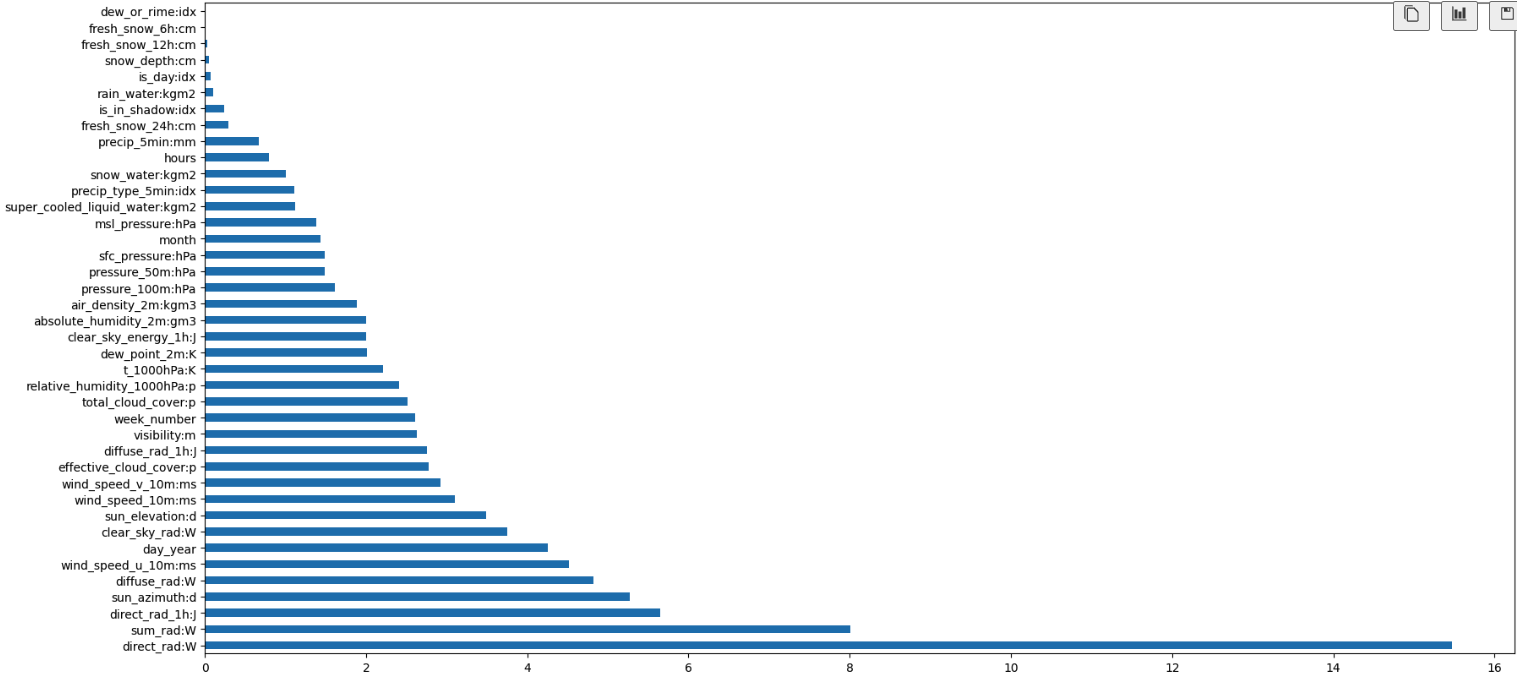

In [ ]:
study5 = optuna.create_study(direction='minimize')
study5.optimize(objective5, n_trials=1)

print('Best hyperparameters:', study5.best_params)
print('Best RMAE:', study5.best_value)

Best RMAE: 276.39995343468485

In [41]:
def objective6(trial):
    params = {

        'learning_rate': trial.suggest_float('learning_rate', 0.0035, 0.05),


        # From last:
        'depth': 9,
        'iterations': 10000,
        "grow_policy": "SymmetricTree",
        'has_time': True,
        'subsample': 0.6201041487044322,
        'colsample_bylevel': 0.7600364600270351,
        'min_data_in_leaf': 92
    }

    model_A = cb.CatBoostRegressor(**params, silent=True)
    model_A.fit(X_data_A_train, y_data_A_train)
    predictions = model_A.predict(X_data_A_val)
    rmae = mean_absolute_error(y_data_A_val, predictions)
    return rmae

In [42]:
study6 = optuna.create_study(direction='minimize')
study6.optimize(objective6, n_trials=10)

print('Best hyperparameters:', study6.best_params)
print('Best RMAE:', study6.best_value)

[I 2023-11-06 18:18:04,865] A new study created in memory with name: no-name-936d4437-191f-4da9-ae5c-48300171637e
[I 2023-11-06 18:20:10,262] Trial 0 finished with value: 278.6018505294251 and parameters: {'learning_rate': 0.009836077111844789}. Best is trial 0 with value: 278.6018505294251.
[I 2023-11-06 18:22:06,659] Trial 1 finished with value: 280.41417398230163 and parameters: {'learning_rate': 0.029598812125119594}. Best is trial 0 with value: 278.6018505294251.
[I 2023-11-06 18:23:59,530] Trial 2 finished with value: 277.601807413404 and parameters: {'learning_rate': 0.014349612546871697}. Best is trial 2 with value: 277.601807413404.
[I 2023-11-06 18:25:59,787] Trial 3 finished with value: 279.7640935390968 and parameters: {'learning_rate': 0.013481647141212798}. Best is trial 2 with value: 277.601807413404.
[I 2023-11-06 18:27:55,962] Trial 4 finished with value: 282.1058876935137 and parameters: {'learning_rate': 0.042922871327738955}. Best is trial 2 with value: 277.60180741

KeyboardInterrupt: 

In [43]:
model_A = cb.CatBoostRegressor(silent=True)
model_A.fit(X_data_A_train, y_data_A_train)
predictions = model_A.predict(X_data_A_val)
rmae = mean_absolute_error(y_data_A_val, predictions)

print(rmae)

283.2915565014228


In [50]:

def objective7(trial):
    params = {
        

        # From last:
        'iterations': 10000,
        "grow_policy": "SymmetricTree",
        'has_time': True,
        'learning_rate': 0.0035170308367742866,
        'depth': 9,
        'subsample': 0.6201041487044322,
        'colsample_bylevel': 0.7600364600270351,
        'min_data_in_leaf': 92
    }

    model_A = cb.CatBoostRegressor(**params, silent=True)
    model_A.fit(X_data_A_train, y_data_A_train)
    predictions = model_A.predict(X_data_A_val)
    rmae = mean_absolute_error(y_data_A_val, predictions)

    return rmae

In [51]:
study7 = optuna.create_study(direction='minimize')
study7.optimize(objective7, n_trials=1)

print('Best hyperparameters:', study7.best_params)
print('Best RMAE:', study7.best_value)

[I 2023-11-06 18:50:42,866] A new study created in memory with name: no-name-be9e1d33-ce4b-4411-9496-2df42564df48
[I 2023-11-06 18:52:47,926] Trial 0 finished with value: 131.14438008806505 and parameters: {}. Best is trial 0 with value: 131.14438008806505.


Best hyperparameters: {}
Best RMAE: 131.14438008806505


In [54]:
def objective8(trial):
    params = {
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0.1, 10),

        # From last:
        'iterations': 10000,
        'grow_policy': 'SymmetricTree',
        'has_time': True,
        'learning_rate': 0.0035170308367742866,
        'depth': 9,
        'subsample': 0.6201041487044322,
        'colsample_bylevel': 0.7600364600270351,
        'min_data_in_leaf': 92
    }

    model_A = cb.CatBoostRegressor(**params, silent=True)
    model_A.fit(X_data_A_train, y_data_A_train)
    predictions = model_A.predict(X_data_A_val)
    rmae = mean_absolute_error(y_data_A_val, predictions)

    return rmae

In [55]:
study8 = optuna.create_study(direction='minimize')
study8.optimize(objective8, n_trials=10)

print('Best hyperparameters:', study8.best_params)
print('Best RMAE:', study8.best_value)

[I 2023-11-06 19:02:52,720] A new study created in memory with name: no-name-ba4656fb-4bd9-4bef-a022-6136d71a8902


[I 2023-11-06 19:05:01,261] Trial 0 finished with value: 130.98765720468998 and parameters: {'l2_leaf_reg': 3.0834710349738006}. Best is trial 0 with value: 130.98765720468998.
[I 2023-11-06 19:07:09,298] Trial 1 finished with value: 131.50306804565443 and parameters: {'l2_leaf_reg': 7.617289400002289}. Best is trial 0 with value: 130.98765720468998.
[I 2023-11-06 19:25:34,499] Trial 2 finished with value: 131.19879810567855 and parameters: {'l2_leaf_reg': 3.489177382330452}. Best is trial 0 with value: 130.98765720468998.
[I 2023-11-06 19:48:15,756] Trial 3 finished with value: 131.77411378551645 and parameters: {'l2_leaf_reg': 9.709860375765455}. Best is trial 0 with value: 130.98765720468998.
[I 2023-11-06 19:50:18,586] Trial 4 finished with value: 131.1705319358994 and parameters: {'l2_leaf_reg': 4.516608366857583}. Best is trial 0 with value: 130.98765720468998.
[I 2023-11-06 19:52:26,585] Trial 5 finished with value: 131.1413608927527 and parameters: {'l2_leaf_reg': 3.37134897038

Best hyperparameters: {'l2_leaf_reg': 2.9054356273412414}
Best RMAE: 130.93930210804382


[I 2023-11-06 19:02:52,720] A new study created in memory with name: no-name-ba4656fb-4bd9-4bef-a022-6136d71a8902
[I 2023-11-06 19:05:01,261] Trial 0 finished with value: 130.98765720468998 and parameters: {'l2_leaf_reg': 3.0834710349738006}. Best is trial 0 with value: 130.98765720468998.

[I 2023-11-06 19:07:09,298] Trial 1 finished with value: 131.50306804565443 and parameters: {'l2_leaf_reg': 7.617289400002289}. Best is trial 0 with value: 130.98765720468998.

[I 2023-11-06 19:25:34,499] Trial 2 finished with value: 131.19879810567855 and parameters: {'l2_leaf_reg': 3.489177382330452}. Best is trial 0 with value: 130.98765720468998.

[I 2023-11-06 19:48:15,756] Trial 3 finished with value: 131.77411378551645 and parameters: {'l2_leaf_reg': 9.709860375765455}. Best is trial 0 with value: 130.98765720468998.

[I 2023-11-06 19:50:18,586] Trial 4 finished with value: 131.1705319358994 and parameters: {'l2_leaf_reg': 4.516608366857583}. Best is trial 0 with value: 130.98765720468998.

[I 2023-11-06 19:52:26,585] Trial 5 finished with value: 131.1413608927527 and parameters: {'l2_leaf_reg': 3.3713489703874715}. Best is trial 0 with value: 130.98765720468998.

[I 2023-11-06 19:54:32,210] Trial 6 finished with value: 131.26360557274936 and parameters: {'l2_leaf_reg': 2.871679101731201}. Best is trial 0 with value: 130.98765720468998.

[I 2023-11-06 19:56:42,346] Trial 7 finished with value: 131.5070737058586 and parameters: {'l2_leaf_reg': 5.972429575858328}. Best is trial 0 with value: 130.98765720468998.

[I 2023-11-06 19:59:03,798] Trial 8 finished with value: 130.93930210804382 and parameters: {'l2_leaf_reg': 2.9054356273412414}. Best is trial 8 with value: 130.93930210804382.

[I 2023-11-06 20:01:16,710] Trial 9 finished with value: 131.2346593888236 and parameters: {'l2_leaf_reg': 1.8480635911960672}. Best is trial 8 with value: 130.93930210804382.

Best hyperparameters: {'l2_leaf_reg': 2.9054356273412414}

Best RMAE: 130.93930210804382

In [ ]:

params = {
    'depth': 14,
    'l2_leaf_reg': 3,

    # From last:
    'iterations': 10000,
    'grow_policy': 'SymmetricTree',
    'has_time': True,
    'learning_rate': 0.0035170308367742866,
    'subsample': 0.6201041487044322,
    'colsample_bylevel': 0.7600364600270351,
    'min_data_in_leaf': 92
}

model_A = cb.CatBoostRegressor(**params, silent=True)
model_A.fit(X_data_A_train, y_data_A_train)
predictions = model_A.predict(X_data_A_val)
rmae = mean_absolute_error(y_data_A_val, predictions)
print(rmae)



In [ ]:
# Next Tries:
# bootstrap_type
# 

### Preds !

In [73]:

params = {
    'depth': 12,
    'l2_leaf_reg': 3,

    # From last:
    'iterations': 5000,
    'grow_policy': 'SymmetricTree',
    'has_time': True,
    'learning_rate': 0.0035170308367742866,
    'subsample': 0.6201041487044322,
    'colsample_bylevel': 0.7600364600270351,
    'min_data_in_leaf': 92
}

model_A = cb.CatBoostRegressor(**params, silent=True)
model_B = cb.CatBoostRegressor(**params, silent=True)
model_C = cb.CatBoostRegressor(**params, silent=True)

In [66]:
test_A = pd.read_csv("current_csv_files/test_A.csv", index_col='date_forecast')
test_A = test_A.drop('date_calc', axis='columns')
test_A = test_A.astype('float')

test_B = pd.read_csv("current_csv_files/test_B.csv", index_col='date_forecast')
test_B = test_B.drop('date_calc', axis='columns')
test_B = test_B.astype('float')

test_C = pd.read_csv("current_csv_files/test_C.csv", index_col='date_forecast')
test_C = test_C.drop('date_calc', axis='columns')
test_C = test_C.astype('float')

In [ ]:
X_data_A = data_A
y_data_A = X_data_A.pop('target')

X_data_B = data_B
y_data_B = X_data_B.pop('target')

X_data_C = data_C
y_data_C = X_data_C.pop('target')


In [75]:
model_A.fit(X_data_A, y_data_A)

In [76]:
preds_A = model_A.predict(test_A)

In [77]:
model_B.fit(X_data_B, y_data_B)

In [78]:
preds_B = model_B.predict(test_B)

In [79]:
model_C.fit(X_data_C, y_data_C)

In [80]:
preds_C = model_C.predict(test_C)

In [86]:
A = pd.Series(data=preds_A)
B = pd.Series(data=preds_B)
C = pd.Series(data=preds_C)

pred = pd.concat([A, B, C], ignore_index=True)
pred_non_neg = pred.clip(lower=0)
pred_non_neg.to_csv("teo_subs/teo_sub_2.csv")